In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, Dropout, Input, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import categorical_accuracy, binary_accuracy
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter
import gc
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, BatchNormalization
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import backend

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [58]:
!ls

0.2.0.zip  fastText-0.2.0  glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
data.csv   fast.zip	   glove.6B.200d.txt  glove.6B.50d.txt	 sample_data


In [0]:
data = pd.DataFrame(pd.read_csv('data.csv', encoding = "utf8"))

In [3]:
data.head()

,Abstract,THEORETICAL,ENGINEERING,EMPIRICAL,OTHERS,Title
0,Rapid popularity of Internet of Things (IoT) a...,1.0,0.0,0.0,0.0,A Brain-Inspired Trust Management Model to Ass...
1,"In this paper, we address the problem of compu...",1.0,0.0,0.0,0.0,On Efficient Computation of Shortest Dubins Pa...
2,High quality upsampling of sparse 3D point clo...,0.0,1.0,0.0,0.0,Data-driven Upsampling of Point Clouds
3,Internet is the main source of information now...,0.0,0.0,1.0,0.0,Accessibility or Usability of InteractSE? A He...
4,Automated Facial Expression Recognition (FER) ...,0.0,1.0,0.0,0.0,Spatio-Temporal Facial Expression Recognition ...


# abstract

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
texts = data['Abstract']
texts = texts.str.lower()

In [6]:
texts[0]

'rapid popularity of internet of things (iot) and cloud computing permits neuroscientists to collect multilevel and multichannel brain data to better understand brain functions, diagnose diseases, and devise treatments.$$$to ensure secure and reliable data communication between end-to-end (e2e) devices supported by current iot and cloud infrastructure, trust management is needed at the iot and user ends.$$$this paper introduces a neuro-fuzzy based brain-inspired trust management model (tmm) to secure iot devices and relay nodes, and to ensure data reliability.$$$the proposed tmm utilizes node behavioral trust and data trust estimated using adaptive neuro-fuzzy inference system and weighted-additive methods respectively to assess the nodes trustworthiness.$$$in contrast to the existing fuzzy based tmms, the ns2 simulation results confirm the robustness and accuracy of the proposed tmm in identifying malicious nodes in the communication network.$$$with the growing usage of cloud based io

In [0]:
for i in range(len(texts)):
  str = texts[i]
  texts[i] = str.replace('$$$', '\n')

In [0]:
import string
for c in string.punctuation:
    texts = texts.str.replace(c, ' ')

In [0]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
for i in range(len(texts)):
    token = word_tokenize(texts[i]) 
    temp = [w for w in token if not w in stop_words]
    texts[i] = " ".join(temp)

In [10]:
print(texts[0])

rapid popularity internet things iot cloud computing permits neuroscientists collect multilevel multichannel brain data better understand brain functions diagnose diseases devise treatments ensure secure reliable data communication end end e2e devices supported current iot cloud infrastructure trust management needed iot user ends paper introduces neuro fuzzy based brain inspired trust management model tmm secure iot devices relay nodes ensure data reliability proposed tmm utilizes node behavioral trust data trust estimated using adaptive neuro fuzzy inference system weighted additive methods respectively assess nodes trustworthiness contrast existing fuzzy based tmms ns2 simulation results confirm robustness accuracy proposed tmm identifying malicious nodes communication network growing usage cloud based iot frameworks neuroscience research integrating proposed tmm existing infrastructure assure secure reliable data communication among e2e devices


In [0]:
"""
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
for i in range(len(texts)):
    input_str = word_tokenize(texts[i])
    for j in range(len(input_str)):
        input_str[j] = lemmatizer.lemmatize(input_str[j])
    texts[i] = " ".join(input_str)
"""

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
"""
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
for i in range(len(texts)):
    input_str = word_tokenize(texts[i])
    for j in range(len(input_str)):
        input_str[j] = stemmer.stem(input_str[j])
    texts[i] = " ".join(input_str)
"""

In [0]:
import re
for i in range(len(texts)):
    texts[i] = re.sub(r'\b\d+\b *|\b[a-z]\b *', '', texts[i])

In [12]:
texts[3]

'internet main source information nowadays search engines must various alternative manners search results representation representation methods enable end users especially visually impaired vi web searchers access information web aim paper design evaluate improve interface vi users perform search browse results attempt provides new accessibility tool vi web searchers conceptual modelling technique proposed paper based formal concept analysis fca hides detailed information collected data results approach highlights main discovered concepts focused combined context interactive navigation interface called interactive search engine interactse minimize time effort required vi users standardised set guidelines heuristics used evaluation usability accessibility aspects interface therefore interactse evaluated experts using nielsen heuristics web content accessibility guidelines wcag terms usability accessibility analysis carried based number usability problems identified average severity rati

In [0]:
vocab_size = 50709

tokenizer = Tokenizer(num_words=vocab_size) # Setup tokenizer
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # Generate sequences

In [37]:
word_index = tokenizer.word_index
print('Found {:,} unique words.'.format(len(word_index)))

Found 50,709 unique words.


In [66]:
word_index

61477

In [16]:
# Get the average length of a text
avg = sum(map(len, word_sequences)) / len(word_sequences)

# Get the standard deviation of the sequence length
std = np.sqrt(sum(map(lambda x: (len(x) - avg)**2, word_sequences)) / len(word_sequences))

avg,std

(94.13533333333334, 35.595171068662815)

In [0]:
max_length = 140
abstract = pad_sequences(sequences, maxlen=max_length)

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
sentences = []
for i in range(len(texts)):
    sentences.append(word_tokenize(texts[i]))

In [0]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lc = LancasterStemmer()
from nltk.stem import SnowballStemmer
sb = SnowballStemmer("english")

In [3]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 93.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=06eb28fa38db786a236aeed6629eaaf0e4400ef3edb66d05617eb38de76fa47f
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6ufqx8x/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [14]:
import spacy
from tqdm import tqdm
text_list = texts
nlp = spacy.load('en_core_web_lg', disable=['parser','ner','tagger'])
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)
word_dict = {}
word_index = 1
lemma_dict = {}
docs = nlp.pipe(text_list, n_threads = 2)
word_sequences = []
for doc in tqdm(docs):
    word_seq = []
    for token in doc:
        if (token.text not in word_dict) and (token.pos_ is not "PUNCT"):
            word_dict[token.text] = word_index
            word_index += 1
            lemma_dict[token.text] = token.lemma_
        if token.pos_ is not "PUNCT":
            word_seq.append(word_dict[token.text])
    word_sequences.append(word_seq)
del docs

27000it [00:21, 1229.84it/s]


In [0]:
max_length = 140
train_word_sequences = pad_sequences(word_sequences[:6000], maxlen=max_length, padding='post')
test_word_sequences = pad_sequences(word_sequences[6000:7000], maxlen=max_length, padding='post')
sub_word_sequences = pad_sequences(word_sequences[7000:], maxlen=max_length, padding='post')

# embedding

In [0]:
from gensim.models import Word2Vec
import multiprocessing

In [0]:
EMB_DIM = 300

w2v = Word2Vec(sentences, size = EMB_DIM, window = 5, min_count = 5, negative = 15, iter = 10, workers = multiprocessing.cpu_count())

In [0]:
word_vector = w2v.wv

# glove

In [18]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-01-02 10:05:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-02 10:05:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-02 10:05:21--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [19]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [22]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip

--2019-12-16 12:26:42--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/0.2.0 [following]
--2019-12-16 12:26:42--  https://codeload.github.com/facebookresearch/fastText/zip/0.2.0
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.2.0.zip’

0.2.0.zip               [  <=>               ]   4.10M  12.5MB/s    in 0.3s    

2019-12-16 12:26:43 (12.5 MB/s) - ‘0.2.0.zip’ saved [4304799]



In [0]:
def load_glove(word_dict, lemma_dict):
    EMBEDDING_FILE = 'glove.6B.300d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    embed_size = 300
    nb_words = len(word_dict)+1
    embedding_matrix = np.zeros((nb_words, embed_size), dtype=np.float32)
    unknown_vector = np.zeros((embed_size,), dtype=np.float32) - 1.
    print(unknown_vector[:5])
    for key in tqdm(word_dict):
        word = key
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.lower()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.upper()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.capitalize()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = ps.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lc.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = sb.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lemma_dict[key]
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        """
        if len(key) > 1:
            word = correction(key)
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[word_dict[key]] = embedding_vector
                continue
        """
        embedding_matrix[word_dict[key]] = unknown_vector                    
    return embedding_matrix, nb_words

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
embedding_matrix_glove, nb_words = load_glove(word_dict, lemma_dict)

 23%|██▎       | 11594/50642 [00:00<00:00, 115903.63it/s]

[-1. -1. -1. -1. -1.]


100%|██████████| 50642/50642 [00:01<00:00, 48167.71it/s]


# load fasttext

In [0]:
def load_fasttext(word_dict, lemma_dict):
    EMBEDDING_FILE = 'fast/wiki-news-300d-1M.vec'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)
    embed_size = 300
    nb_words = len(word_dict)+1
    embedding_matrix = np.zeros((nb_words, embed_size), dtype=np.float32)
    unknown_vector = np.zeros((embed_size,), dtype=np.float32) - 1.
    print(unknown_vector[:5])
    for key in tqdm(word_dict):
        word = key
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.lower()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.upper()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = key.capitalize()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = ps.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lc.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = sb.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        word = lemma_dict[key]
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[word_dict[key]] = embedding_vector
            continue
        """
        if len(key) > 1:
            word = correction(key)
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[word_dict[key]] = embedding_vector
                continue
        """
        embedding_matrix[word_dict[key]] = unknown_vector                    
    return embedding_matrix, nb_words

In [61]:
embedding_matrix_fasttext, nb_words = load_fasttext(word_dict, lemma_dict)

 30%|██▉       | 18138/61476 [00:00<00:00, 181353.37it/s]

[-1. -1. -1. -1. -1.]


100%|██████████| 61476/61476 [00:00<00:00, 91733.15it/s]


In [62]:
embedding_matrix = np.concatenate((embedding_matrix_glove, embedding_matrix_fasttext), axis=1)
embedding_matrix_glove.shape, embedding_matrix_fasttext.shape, embedding_matrix.shape

((61477, 300), (61477, 300), (61477, 600))

In [0]:
embedding_matrix = embedding_matrix_glove
embedding_dim = 300
vocab_size = 50643

In [44]:
embedding_matrix.shape

(50643, 300)

# load embedding

In [0]:
embeddings_index = {} # We create a dictionary of word -> embedding

with open('glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0] # The first value is the word, the rest are the values of the embedding
        embedding = np.asarray(values[1:], dtype='float32') # Load embedding
        embeddings_index[word] = embedding # Add embedding to our embedding dictionary


print('Found {:,} word vectors in glove.'.format(len(embeddings_index)))

embedding_dim = 300 # We use 100 dimensional glove vectors

word_index = tokenizer.word_index
nb_words = min(vocab_size, len(word_index)) # How many words are there actually

embedding_matrix = np.zeros((nb_words, embedding_dim))

# The vectors need to be in the same position as their index. 
# Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on

# Loop over all words in the word index
for word, i in word_index.items():
    # If we are above the amount of words we want to use we do nothing
    if i >= vocab_size: 
        continue
    # Get the embedding vector for the word
    embedding_vector = embeddings_index.get(word)
    # If there is an embedding vector, put it in the embedding matrix
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

Found 400,000 word vectors in glove.


# model

In [0]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.h5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
    
    inp = Input(shape = (max_length,))
    xc = Embedding(vocab_size, embedding_dim, input_length=max_length, weights = [embedding_matrix], trainable = False)(inp)
    xc = SpatialDropout1D(spatial_dr)(xc)

    gru = Bidirectional(GRU(units, return_sequences = True))(xc)
    lstm = Bidirectional(LSTM(units, return_sequences = True))(xc)
   
    x = concatenate([gru, lstm])
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 4), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 8), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 16), activation='relu') (x))
    x = Dense(4, activation = "sigmoid")(x)
    print(x.shape)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ['accuracy'])
    model.fit(train_word_sequences, np.array(data[:6000][['THEORETICAL','ENGINEERING','EMPIRICAL','OTHERS']]), batch_size = 128, epochs = 200, shuffle = True, validation_split=0.1, verbose = 1, callbacks = [check_point, early_stop])
    return model


In [0]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.h5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
    
    inp = Input(shape = (max_length,))
    xc = Embedding(vocab_size, embedding_dim, input_length=max_length, weights = [embedding_matrix], trainable = False)(inp)
    xc = SpatialDropout1D(spatial_dr)(xc)

    gru = Bidirectional(GRU(units, return_sequences = True))(xc)
    lstm = Bidirectional(LSTM(units, return_sequences = True))(xc)

    max_pool_gru = GlobalMaxPooling1D()(gru)
    max_pool_lstm = GlobalMaxPooling1D()(lstm)
   
    x = concatenate([max_pool_gru, max_pool_lstm])
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 4), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 8), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 16), activation='relu') (x))
    x = Dense(4, activation = "sigmoid")(x)
    print(x.shape)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ['accuracy'])
    model.fit(train_word_sequences, np.array(data[:6000][['THEORETICAL','ENGINEERING','EMPIRICAL','OTHERS']]), batch_size = 128, epochs = 200, shuffle = True, validation_split=0.1, verbose = 1, callbacks = [check_point, early_stop])
    return model


In [0]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.h5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
    
    inp = Input(shape = (max_length,))
    xc = Embedding(vocab_size, embedding_dim, input_length=max_length, weights = [embedding_matrix], trainable = False)(inp)
    xc = SpatialDropout1D(spatial_dr)(xc)

    x1 = Conv1D(conv_size, kernel_size=4, padding='valid', kernel_initializer='he_uniform')(xc)
    avg_pool1_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
    #max_pool1_gru = Bidirectional(LSTM(units, return_sequences = True))(x1)
    
    #avg_pool1_gru = SpatialDropout1D(spatial_dr)(avg_pool1_gru)
    #max_pool1_gru = SpatialDropout1D(spatial_dr)(max_pool1_gru)
    #x = concatenate([avg_pool1_gru, max_pool1_gru,])
    x = Flatten()(avg_pool1_gru)
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 4), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 8), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 16), activation='relu') (x))
    x = Dense(4, activation = "sigmoid")(x)
    print(x.shape)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ['accuracy'])
    model.fit(train_word_sequences, np.array(data[:6000][['THEORETICAL','ENGINEERING','EMPIRICAL','OTHERS']]), batch_size = 128, epochs = 200, shuffle = True, validation_split=0.1, verbose = 1, callbacks = [check_point, early_stop])
    return model


In [0]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.h5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
    
    inp = Input(shape = (max_length,))
    x = Embedding(vocab_size, embedding_dim, input_length=max_length, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(spatial_dr)(x)

    #x_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
    x1 = Conv1D(conv_size, kernel_size=4, padding='valid', kernel_initializer='he_uniform')(x1)
    avg_pool1_gru = GlobalAveragePooling1D()(x1)
    max_pool1_gru = GlobalMaxPooling1D()(x1)
    
    x = concatenate([avg_pool1_gru, max_pool1_gru])
    print(x.shape)
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 4), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 8), activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 16), activation='relu') (x))
    x = Dense(4, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ['accuracy'])
    model.fit(train_word_sequences, np.array(data[:6000][['THEORETICAL','ENGINEERING','EMPIRICAL','OTHERS']]), batch_size = 128, epochs = 200, shuffle = True, validation_split=0.1, verbose = 1, callbacks = [check_point, early_stop])
    return model


In [83]:
model1 = build_model1(lr = 1e-4, lr_d = 1e-7, units = 256, spatial_dr = 0.5, kernel_size1=3, kernel_size2=2, dense_units=512, dr=0.3, conv_size=16)


(?, 4)
Train on 5400 samples, validate on 600 samples
Epoch 1/200
5376/5400 [============================>.] - ETA: 0s - loss: 0.7838 - acc: 0.5381
Epoch 00001: val_loss improved from inf to 0.67258, saving model to best_model.h5
5400/5400 [==============================] - 69s 13ms/sample - loss: 0.7841 - acc: 0.5380 - val_loss: 0.6726 - val_acc: 0.6650
Epoch 2/200
5376/5400 [============================>.] - ETA: 0s - loss: 0.7500 - acc: 0.5564
Epoch 00002: val_loss improved from 0.67258 to 0.64701, saving model to best_model.h5
5400/5400 [==============================] - 36s 7ms/sample - loss: 0.7498 - acc: 0.5566 - val_loss: 0.6470 - val_acc: 0.6696
Epoch 3/200
5376/5400 [============================>.] - ETA: 0s - loss: 0.7289 - acc: 0.5722
Epoch 00003: val_loss improved from 0.64701 to 0.62388, saving model to best_model.h5
5400/5400 [==============================] - 36s 7ms/sample - loss: 0.7288 - acc: 0.5721 - val_loss: 0.6239 - val_acc: 0.6696
Epoch 4/200
5376/5400 [========

In [48]:
!ls

best_model.h5  glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
data.csv       glove.6B.200d.txt  glove.6B.50d.txt   sample_data


In [84]:
from tensorflow.keras.models import load_model
model1 = load_model('best_model.h5')
pred1 = model1.predict(test_word_sequences, batch_size = 1024, verbose = 1)

InternalError: ignored

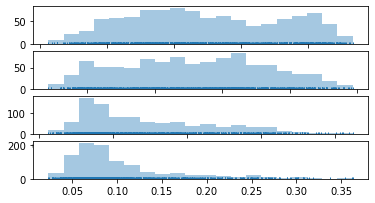

In [43]:
y = np.array(list(pred1))
a = y[:,0]
b = y[:,1]
c = y[:,2]
d = y[:,3]

import seaborn as sns
plt.subplot(5,1,1)
sns.distplot(a, bins=20, kde=False, rug=True);
plt.subplot(5,1,2)
sns.distplot(b, bins=20, kde=False, rug=True);
plt.subplot(5,1,3)
sns.distplot(c, bins=20, kde=False, rug=True);
plt.subplot(5,1,4)
sns.distplot(d, bins=20, kde=False, rug=True);

In [0]:
from sklearn.metrics import f1_score, accuracy_score

In [78]:
#lstm
#pred = pred3 + pred4 + pred5
th1 = 0
th2 = 0
th3 = 0
th4 = 0
max1 = 0
max2 = 0
max3 = 0
max4 = 0
for thre in range(1000):
    y = np.array(list(pred1))
    a = y[:,0]
    b = y[:,1]
    c = y[:,2]
    d = y[:,3]
    for i in range(1000):
        if a[i] > thre*0.001:
            a[i] = 1
        else:
            a[i] = 0
        if b[i] > thre*0.001:
            b[i] = 1
        else:
            b[i] = 0
        if c[i] > thre*0.001:
            c[i] = 1
        else:
            c[i] = 0
        if d[i] > thre*0.001:
            d[i] = 1
        else:
            d[i] = 0
    if max1 < f1_score(a, data['THEORETICAL'][6000:7000]):
        max1 = f1_score(a, data['THEORETICAL'][6000:7000])
        th1 = thre*0.001
    if max2 < f1_score(b, data['ENGINEERING'][6000:7000]):
        max2 = f1_score(b, data['ENGINEERING'][6000:7000])
        th2 = thre*0.001
    if max3 < f1_score(c, data['EMPIRICAL'][6000:7000]):
        max3 = f1_score(c, data['EMPIRICAL'][6000:7000])
        th3 = thre*0.001
    if max4 < f1_score(d, data['OTHERS'][6000:7000]):
        max4 = f1_score(d, data['OTHERS'][6000:7000])
        th4 = thre*0.001
                       
print(max1, th1)
print(max2, th2)
print(max3, th3)
print(max4, th4)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.7069351230425057 0.5690000000000001
0.7317073170731708 0.38
0.5696670776818743 0.24
0.21739130434782608 0.253


In [79]:
#lstm
y = np.array(list(pred1))
a = y[:,0].tolist()
b = y[:,1].tolist()
c = y[:,2].tolist()
d = y[:,3].tolist()
for i in range(1000):
  if a[i] > th1:
    a[i] = 1
  else:
    a[i] = 0
  if b[i] > th2:
    b[i] = 1
  else:
    b[i] = 0
  if c[i] > th3:
    c[i] = 1
  else:
    c[i] = 0
  if d[i] > th4:
    d[i] = 1
  else:
    d[i] = 0
a = a + b + c + d
ans = data['THEORETICAL'][6000:7000].tolist()
ans = ans + data['ENGINEERING'][6000:7000].tolist() + data['EMPIRICAL'][6000:7000].tolist() + data['OTHERS'][6000:7000].tolist()
f1_score(a, ans)

0.6634974533106961

In [58]:
#Bi-directional RNN + pooling layer
#pred = pred3 + pred4 + pred5
th1 = 0
th2 = 0
th3 = 0
th4 = 0
max1 = 0
max2 = 0
max3 = 0
max4 = 0
for thre in range(1000):
    y = np.array(list(pred1))
    a = y[:,0]
    b = y[:,1]
    c = y[:,2]
    d = y[:,3]
    for i in range(1000):
        if a[i] > thre*0.001:
            a[i] = 1
        else:
            a[i] = 0
        if b[i] > thre*0.001:
            b[i] = 1
        else:
            b[i] = 0
        if c[i] > thre*0.001:
            c[i] = 1
        else:
            c[i] = 0
        if d[i] > thre*0.001:
            d[i] = 1
        else:
            d[i] = 0
    if max1 < f1_score(a, data['THEORETICAL'][6000:7000]):
        max1 = f1_score(a, data['THEORETICAL'][6000:7000])
        th1 = thre*0.001
    if max2 < f1_score(b, data['ENGINEERING'][6000:7000]):
        max2 = f1_score(b, data['ENGINEERING'][6000:7000])
        th2 = thre*0.001
    if max3 < f1_score(c, data['EMPIRICAL'][6000:7000]):
        max3 = f1_score(c, data['EMPIRICAL'][6000:7000])
        th3 = thre*0.001
    if max4 < f1_score(d, data['OTHERS'][6000:7000]):
        max4 = f1_score(d, data['OTHERS'][6000:7000])
        th4 = thre*0.001
                       
print(max1, th1)
print(max2, th2)
print(max3, th3)
print(max4, th4)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.7257019438444925 0.41500000000000004
0.7171875 0.193
0.5681818181818182 0.401
0.1935483870967742 0.256


In [59]:
#Bi-directional RNN + pooling layer
y = np.array(list(pred1))
a = y[:,0].tolist()
b = y[:,1].tolist()
c = y[:,2].tolist()
d = y[:,3].tolist()
for i in range(1000):
  if a[i] > th1:
    a[i] = 1
  else:
    a[i] = 0
  if b[i] > th2:
    b[i] = 1
  else:
    b[i] = 0
  if c[i] > th3:
    c[i] = 1
  else:
    c[i] = 0
  if d[i] > th4:
    d[i] = 1
  else:
    d[i] = 0
a = a + b + c + d
ans = data['THEORETICAL'][6000:7000].tolist()
ans = ans + data['ENGINEERING'][6000:7000].tolist() + data['EMPIRICAL'][6000:7000].tolist() + data['OTHERS'][6000:7000].tolist()
f1_score(a, ans)

0.6686646686646686

In [73]:
# CNN + pooling 
th1 = 0
th2 = 0
th3 = 0
th4 = 0
max1 = 0
max2 = 0
max3 = 0
max4 = 0
for thre in range(1000):
    y = np.array(list(pred1))
    a = y[:,0]
    b = y[:,1]
    c = y[:,2]
    d = y[:,3]
    for i in range(1000):
        if a[i] > thre*0.001:
            a[i] = 1
        else:
            a[i] = 0
        if b[i] > thre*0.001:
            b[i] = 1
        else:
            b[i] = 0
        if c[i] > thre*0.001:
            c[i] = 1
        else:
            c[i] = 0
        if d[i] > thre*0.001:
            d[i] = 1
        else:
            d[i] = 0
    if max1 < f1_score(a, data['THEORETICAL'][6000:7000]):
        max1 = f1_score(a, data['THEORETICAL'][6000:7000])
        th1 = thre*0.001
    if max2 < f1_score(b, data['ENGINEERING'][6000:7000]):
        max2 = f1_score(b, data['ENGINEERING'][6000:7000])
        th2 = thre*0.001
    if max3 < f1_score(c, data['EMPIRICAL'][6000:7000]):
        max3 = f1_score(c, data['EMPIRICAL'][6000:7000])
        th3 = thre*0.001
    if max4 < f1_score(d, data['OTHERS'][6000:7000]):
        max4 = f1_score(d, data['OTHERS'][6000:7000])
        th4 = thre*0.001
                       
print(max1, th1)
print(max2, th2)
print(max3, th3)
print(max4, th4)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.727854855923159 0.384
0.726094003241491 0.314
0.5501066098081023 0.279
0.21052631578947367 0.164


In [74]:
# CNN + pooling
y = np.array(list(pred1))
a = y[:,0].tolist()
b = y[:,1].tolist()
c = y[:,2].tolist()
d = y[:,3].tolist()
for i in range(1000):
  if a[i] > th1:
    a[i] = 1
  else:
    a[i] = 0
  if b[i] > th2:
    b[i] = 1
  else:
    b[i] = 0
  if c[i] > th3:
    c[i] = 1
  else:
    c[i] = 0
  if d[i] > th4:
    d[i] = 1
  else:
    d[i] = 0
a = a + b + c + d
ans = data['THEORETICAL'][6000:7000].tolist()
ans = ans + data['ENGINEERING'][6000:7000].tolist() + data['EMPIRICAL'][6000:7000].tolist() + data['OTHERS'][6000:7000].tolist()
f1_score(a, ans)

0.6571517219981383

In [41]:
len(ans)

1001

In [68]:
#CNN - pooling + RNN
th1 = 0
th2 = 0
th3 = 0
th4 = 0
max1 = 0
max2 = 0
max3 = 0
max4 = 0
for thre in range(1000):
    y = np.array(list(pred1))
    a = y[:,0]
    b = y[:,1]
    c = y[:,2]
    d = y[:,3]
    for i in range(1000):
        if a[i] > thre*0.001:
            a[i] = 1
        else:
            a[i] = 0
        if b[i] > thre*0.001:
            b[i] = 1
        else:
            b[i] = 0
        if c[i] > thre*0.001:
            c[i] = 1
        else:
            c[i] = 0
        if d[i] > thre*0.001:
            d[i] = 1
        else:
            d[i] = 0
    if max1 < f1_score(a, data['THEORETICAL'][6000:7000]):
        max1 = f1_score(a, data['THEORETICAL'][6000:7000])
        th1 = thre*0.001
    if max2 < f1_score(b, data['ENGINEERING'][6000:7000]):
        max2 = f1_score(b, data['ENGINEERING'][6000:7000])
        th2 = thre*0.001
    if max3 < f1_score(c, data['EMPIRICAL'][6000:7000]):
        max3 = f1_score(c, data['EMPIRICAL'][6000:7000])
        th3 = thre*0.001
    if max4 < f1_score(d, data['OTHERS'][6000:7000]):
        max4 = f1_score(d, data['OTHERS'][6000:7000])
        th4 = thre*0.001
                       
print(max1, th1)
print(max2, th2)
print(max3, th3)
print(max4, th4)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.7093712930011864 0.429
0.7222222222222223 0.41100000000000003
0.555045871559633 0.259
0.1904761904761905 0.124


In [69]:
#CNN - pooling + RNN
y = np.array(list(pred1))
a = y[:,0].tolist()
b = y[:,1].tolist()
c = y[:,2].tolist()
d = y[:,3].tolist()
for i in range(1000):
  if a[i] > th1:
    a[i] = 1
  else:
    a[i] = 0
  if b[i] > th2:
    b[i] = 1
  else:
    b[i] = 0
  if c[i] > th3:
    c[i] = 1
  else:
    c[i] = 0
  if d[i] > th4:
    d[i] = 1
  else:
    d[i] = 0
a = a + b + c + d
ans = data['THEORETICAL'][6000:7000].tolist()
ans = ans + data['ENGINEERING'][6000:7000].tolist() + data['EMPIRICAL'][6000:7000].tolist() + data['OTHERS'][6000:7000].tolist()
f1_score(a, ans)

0.6596445029624753